In [1]:
import keras
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras import optimizers
np.random.seed(10)
# 載入資料
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

Using TensorFlow backend.


In [2]:
#資料前置處理
x_train = x_train_image.reshape(60000, 784) #28x28=784 (one-dimensional sequence data)
x_test = x_test_image.reshape(10000, 784)
x_train = x_train.astype('float32') #型別轉換
x_test = x_test.astype('float32')
x_train_norm = x_train/255 # 正規化 (0~1)
x_test_norm = x_test/255

In [3]:
# 將 label 標籤轉為 one-hot-encoding
num_classes = 10 # 分類數量 0~9
y_train_ohe = keras.utils.to_categorical(y_train_label, num_classes)
y_test_ohe = keras.utils.to_categorical(y_test_label, num_classes)

In [24]:
# 建立模型
model = Sequential() # Build Linear Model
model.add(Dense(units=256, input_dim=784, activation='relu', kernel_initializer='normal', name='hidden_1')) # Dense: full connection
model.add(Dropout(0.5, name='dropout_1')) # rate is between 0.2 and 0.5
model.add(Dense(units=256, activation='relu', kernel_initializer='normal', name='hidden_2')) # kernel_initializer 權重初始化
model.add(Dropout(0.5, name='dropout_2')) 
model.add(Dense(units=num_classes, activation='softmax', name='output')) # output: 10

# 網路結構
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_2 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [25]:
batch_size = 128 # mini-batch
epochs = 10 # 執行週期
#定義訓練方式
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#開始訓練 (將訓練資料: 80%訓練，20%驗證)
history = model.fit(x_train_norm, y_train_ohe,
                    batch_size=batch_size,
                    validation_split=0.2,
                    epochs=epochs,
                    verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 109us/step - loss: 0.5119 - acc: 0.8380 - val_loss: 0.1771 - val_acc: 0.9482
Epoch 2/10
48000/48000 [==============================] - 5s 99us/step - loss: 0.2300 - acc: 0.9318 - val_loss: 0.1303 - val_acc: 0.9605
Epoch 3/10
48000/48000 [==============================] - 5s 99us/step - loss: 0.1773 - acc: 0.9464 - val_loss: 0.1139 - val_acc: 0.9667
Epoch 4/10
48000/48000 [==============================] - 5s 97us/step - loss: 0.1557 - acc: 0.9527 - val_loss: 0.1031 - val_acc: 0.9688
Epoch 5/10
48000/48000 [==============================] - 5s 97us/step - loss: 0.1367 - acc: 0.9589 - val_loss: 0.0943 - val_acc: 0.9733
Epoch 6/10
48000/48000 [==============================] - 5s 98us/step - loss: 0.1283 - acc: 0.9606 - val_loss: 0.0894 - val_acc: 0.9738
Epoch 7/10
48000/48000 [==============================] - 5s 99us/step - loss: 0.1146 - acc: 0.9660 - val_loss: 0.0905 - val_ac

In [26]:
#評估模型準確率
score = model.evaluate(x_test_norm, y_test_ohe, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0731363663079
Test accuracy: 0.9792


In [27]:
#顯示訓練過程
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):
    epochs = range(1, len(train_history.history[train]) + 1)
    plt.plot(epochs, train_history.history[train], 'b')  
    plt.plot(epochs, train_history.history[validation], 'r')  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()

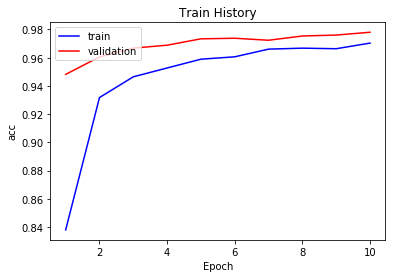

In [28]:
show_train_history(history, 'acc', 'val_acc')

In [9]:
#進行預測
prediction = model.predict_classes(x_test_norm)  # using test data to make prediction and save result to predict

In [10]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [11]:
# 顯示多筆資料
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  #最多顯示25筆資料
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  # l: label, p: prediction
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()

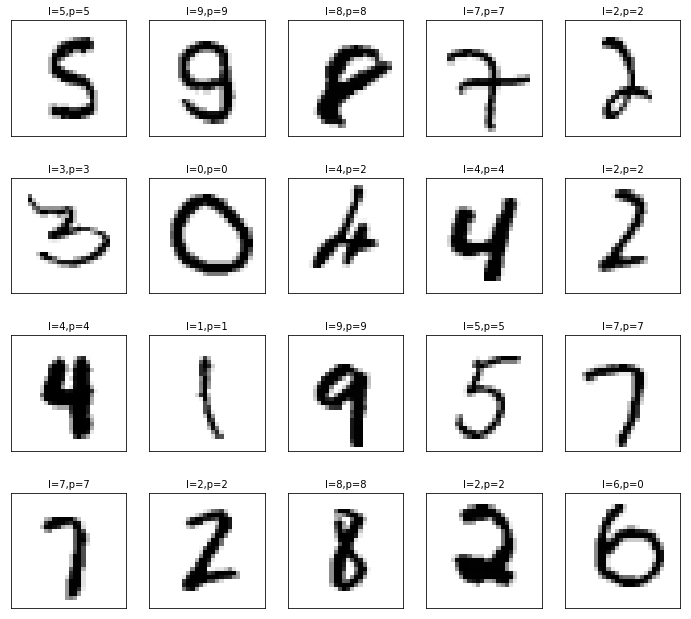

In [12]:
plot_images_labels_predict(x_test_image, y_test_label, prediction, idx=240, num=20)

In [13]:
import pandas as pd
pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict']) #預測正確和錯誤的數量

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,2,0,0,1,2,1,1,0
1,0,1124,4,1,0,1,2,0,3,0
2,0,0,1023,2,1,0,1,3,2,0
3,0,0,9,980,1,4,0,4,3,9
4,1,0,5,0,959,0,2,1,2,12
5,2,0,0,8,0,864,8,1,5,4
6,5,2,1,1,2,3,943,0,1,0
7,2,4,8,2,0,0,0,1003,3,6
8,4,1,8,4,1,3,3,2,945,3
